In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_df(path):
    # Load data to a dataframe
    with open(path) as f:
        d = yaml.load(f)

    df = pd.DataFrame(columns=['run', 'nworkers', 'method', 'f(x)', 'nfev', 'ng', 'time'])

    for k1 in d.keys():
        for k2 in d[k1].keys():
            for k3 in d[k1][k2].keys():
                s = pd.Series({
                    'run': int(k1.split('=')[-1]),
                    'nworkers': int(k2.split('=')[-1]),
                    'method': k3.split('=')[-1],
                    'f(x)': float(d[k1][k2][k3]['f(x)']),
                    'nfev': float(d[k1][k2][k3]['nfev']),
                    'ng': float(d[k1][k2][k3]['ng']),
                    'time': float(d[k1][k2][k3]['time']),
                })
                df = df.append(s, ignore_index=True)

    return df

df = load_df('results/parallel_results_1.yaml')

In [3]:
# Calculate average results
m = df.groupby(['method', 'nworkers']).median()
m

f(x)       nfev      ng         time
method nworkers                                          
ga     1         2.001583  1000000.0  1000.0  1259.090847
       2         1.916023  1001000.0  1000.0   451.334264
       3         2.024548  1000000.0  1000.0   293.759694
       4         2.159659  1001000.0  1000.0   271.719568
       5         1.901303  1001000.0  1000.0   217.511640
       6         2.203125   997000.0  1000.0   221.360055
       7         1.984697   995000.0  1000.0   164.667265
       8         2.213146  1001000.0  1000.0   199.408309

In [4]:
m.loc['ga']['time']

nworkers
1    1259.090847
2     451.334264
3     293.759694
4     271.719568
5     217.511640
6     221.360055
7     164.667265
8     199.408309
Name: time, dtype: float64

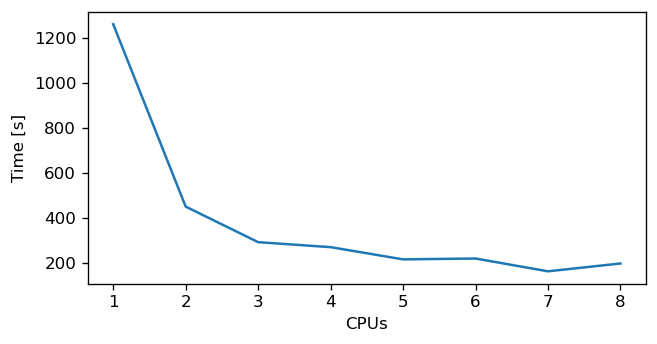

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)

ax.plot(m.loc['ga']['time'])
ax.set_xlabel('CPUs')
ax.set_ylabel('Time [s]')

fig.savefig('results/comparison_parallel.png')